<a href="https://colab.research.google.com/github/CienciaDatosUdea/002_EstudiantesAprendizajeEstadistico/blob/main/semestre2024-2/Laboratorios/Laboratorio_03_reg_lin_grad_descV1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


# Estructura de un problema general de machine learning:
Los modelos de aprendizaje estadístico que pueden ser industriazados,   puede ser [esquematizado](https://proceedings.neurips.cc/paper/2015/file/86df7dcfd896fcaf2674f757a2463eba-Paper.pdf) según se muestra en la siguiente imagen:

![MLOPs](https://github.com/hernansalinas/Curso_aprendizaje_estadistico/blob/main/Sesiones/imagenes/Sesion_04_MLOP_General.png?raw=true)


![MLOPs](https://github.com/hernansalinas/Curso_aprendizaje_estadistico/blob/main/Sesiones/imagenes/Sesion_04_MLOPS.png?raw=true)



A partir de ahora, nos concentraremos en entender los modelos de que ocurren dentro de la caja negra, y como encajan dentro de una estructura general de los modelos de machine learning ML.

De forma general un modelo de [ML](https://www.coursera.org/learn/machine-learning)   puede ser visualizado de la siguiente manera :

![SupervisedModel](https://github.com/hernansalinas/Curso_aprendizaje_estadistico/blob/main/Sesiones/imagenes/Sesion_04_GeneralTraining.png?raw=true)



## ¿Cual es el mejor enfoque para optimizar un problema?

[Non-Free-Lunch-Theorem](https://ieeexplore.ieee.org/document/585893):
Por cada par de algoritmos hay tantos problemas en el que el primer algoritmo es mejor que el segundo como problemas en el que el segundo es mejor que el primero, como consecuencia no existe un unico algoritmo inteligente para optimizar un problema, siempre es recomendable emplear un cierto conocimiento especifico de un problema.



##  Estructura general de los problemas ML:
1. Construir hipótesis.
2. Elegir parametros.
3. Elegir la función de coste.
4. Minimizar los datos.
5. Validar y entrenar.



## Aprendizaje Supervisado :

- Datos etiquetados
- Retroalimentación directa
- Predicción de resultados.










# Regresión lineal:

Supongamos que tenemos un sistema en el que existe un predicor con  **m** valores de entrenamiento,  asi:   $ (x^{(1)}, y^{(1)} ) , (x^{(2)}, y^{(2)}) ... (x^{(m)}, y^{(m)})$


|Training|Y      | X_1  |
|--------|----------|----------|
|1|$Y^{1}$ | $X_1^{1}$|
|2|$Y^{2}$ | $X_1^{2}$|
|.|.         | .        |
|.|.         | .        |
|.|.         | .        |
|m|$Y^{m}$ | $X_1^{m}$  |



Podemos definir un modelo lineal  como : $h(X) = \theta_0 + \theta_1 X$ con $(\theta_0 , \theta_1)$ parámetros. Nuestro objetivo es encontrar el conjunto de puntos  $(\theta_0 , \theta_1)$ que se encuentan más "cercano" a $Y$ para cada $X$.

Para la optimización, vamos a definir la función de coste **$J(\theta_1,\theta_2 )$** para las muestras de entrenamiento como aquella que garantiza la distancia euclidiana respecto a la hipótesis planteada:

#### Función de coste para regresión: Error Cuadrático Medio:

Esta mide la media de los errores al cuadrado entre las predicciones del modelo y los valores reales.

\begin{equation}
J(\theta_1, \theta_2)=\frac{1}{2m} \sum_{i=0}^m ( h_{\theta} (x^{(i)})-y^{(i)})^2
\end{equation}

Para encontrar los valores  $(\theta_0 , \theta_1)$ se necesita  minimizar la función de coste, que permite obtener los valores más cercanos,  esta minimización podrá ser realizada a través de diferentes métodos, el más conocido es el gradiente descendente.

![](https://github.com/hernansalinas/Curso_aprendizaje_estadistico/blob/main/Sesiones/imagenes/fig00.png?raw=true=50x)




Supongamos un modelo lineal para realizar la predicción, así nuestro modelo estará basado en la siguiente hipotesis de trabajo:

$h(X) =\theta_0 + \theta_1 X$


Reemplazando el modelo anterior en la función de coste, tenemos que:

\begin{equation}
J(\theta_1, \theta_2)=\frac{1}{2m} \sum_{i=0}^m ( (\theta_0 + \theta_1 X)- y^{(i)})^2
\end{equation}



# Laboratorio 03


1. Supongamos que un conjunto de características y datos etiquetados están dados de la siguiente manera:

Crear un data frame de pandas con los siguientes datos:

|Entrenamiento|Y| X_1 |
|-|-|-|
|0|0|0|
|1|1|1|
|2|2|2|
|3|3|3|
|4|4|4|
|m|5|5|




2. Crear una función para calcular la función de coste.

3. Asumiendo que $\theta_0=0$, represente gráficamente la función de costo para diferentes valores de $\theta_1$. Determine el valor mínimo de la función de costo y, con este valor, grafique la ecuación de regresión obtenida sobre los datos del dataframe que ha construido.






In [22]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

### Regresión lineal en 1D ($\theta_0 = 0$)

In [43]:
X = np.array([0,1,2,3,4,5])
Y = np.array([0,1,2,3,4,5])
m = len(X)
m

6

Construcción del modelo lineal:

In [44]:
def H(theta, X):
  m = len(X)
  XMatrix = np.array([np.ones(m), X])
  h = theta.T@XMatrix   # Vector de yi ajustados al modelo
  return h

Función de costo:

In [46]:
def costo(theta, X, Y):
  h = H(theta, X)
  J = 0.5*np.mean((h-Y)**2)
  return J

Parámetros del modelo:

In [48]:
n = 100
theta0 = 0
theta1 = np.linspace(-10, 10, n)

Js = np.zeros(n)
for i, theta1_ in enumerate(theta1):
  theta = np.array([[theta0], [theta1_]])
  Js[i] = costo(theta, X, Y)

Curva de costo:

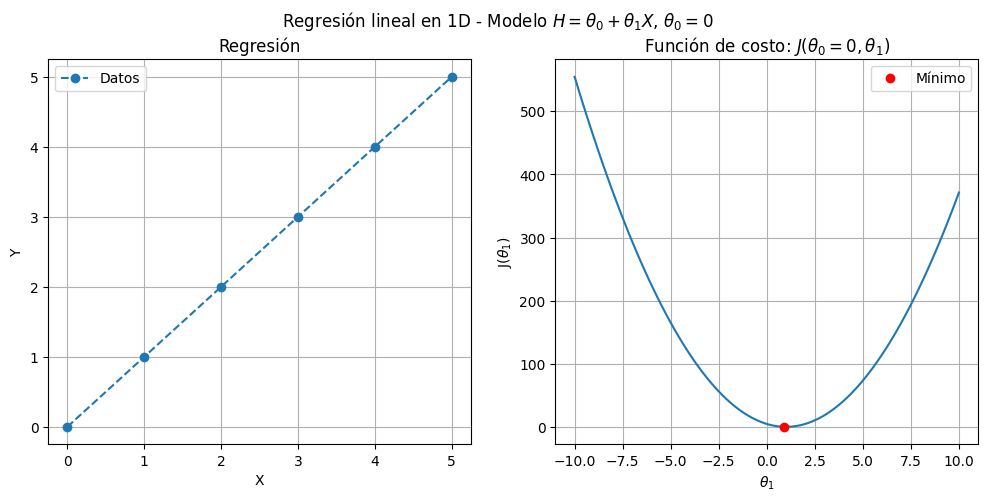

In [54]:
fig = plt.figure(figsize=(12, 5))
fig.suptitle(r"Regresión lineal en 1D - Modelo $H = \theta_0 + \theta_1 X$, $\theta_0=0$")

ax = fig.add_subplot(121)
ax.set_title(r"Regresión")
ax.plot(X, Y, 'o--', label='Datos')
ax.set_xlabel(r"X")
ax.set_ylabel(r"Y")
ax.legend()
ax.grid()

ax = fig.add_subplot(122)
ax.set_title(r"Función de costo: $J(\theta_0=0, \theta_1)$")
ax.plot(theta1, Js)
ax.set_xlabel(r"$\theta_1$")
ax.set_ylabel(r"J$(\theta_1)$")
ax.plot(theta1[np.argmin(Js)], Js[np.argmin(Js)], 'or', label='Mínimo')
ax.legend()
ax.grid()

plt.show()

4. Suponiendo ahora que los datos de entrenamiento vienen dados de la siguiente manera:

|Entrenamiento|Y| X_1 |
|-|-|-|
|0|0|0|
|1|1|1|
|2|2|2|
|3|3|3|
|4|4|4|
|m|5|5|

Encontrar la función de coste para diferentes valores de $\theta_0$, $\theta_1$.
Para ello puede emplear los metodos `surface` y `contour` dentro de la libreria de `matplotlib`.  Construya primero, con los valores de $\theta_0$, $\theta_1 $ definidos un `np.meshgrid` y evalue  para cada punto $\theta_0$, $\theta_1$ la función de coste.

Para el gráfico 3D puede emplear algo similar a las siguientes lineas de código

```
fig = plt.figure()
ax = fig.add_subplot(111)
ax.plot_surface(t0, t1, J )
ax.contour(t0, t1, J, 200,   linestyles="solid")
ax.set_xlabel("$\\theta_0$")
ax.set_ylabel("$\\theta_1$")
plt.show()
```


En los casos anteriores la solución solo involucra 1 y 2 parámetros para la representación de la función de coste en  2D y 3D respectivamente. Cuando se tienen más parametros a optmizar, no podemos tener una representacion gráfica, análoga a los casos anteriores. Notese además que los datos anteriores no tiene ningún ruido y solo se esta realizados  de esta manera, por motivos didácticos.

5. Encontrar la expresión teórica para la función de coste en el caso 1D y 2D.

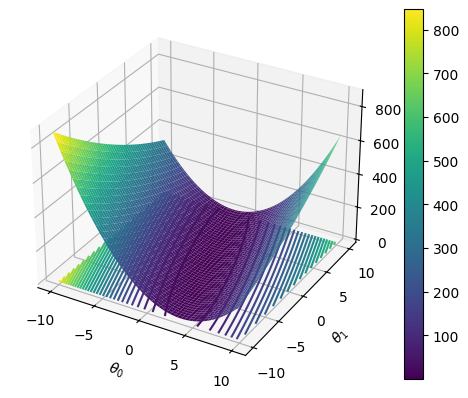

In [55]:
# Parámetros del modelo
n = 100
theta0 = np.linspace(-10, 10, n)
theta1 = np.linspace(-10, 10, n)

Js = np.zeros(shape=(n,n))
for i in range(n):#, theta_ in enumerate(theta1):
  for j in range(n):
    theta = np.array([[theta0[i]], [theta1[j]]])
    Js[i,j] = costo(theta, X, Y)

T0, T1 = np.meshgrid(theta0, theta1)

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
sup = ax.plot_surface(T0, T1, Js, cmap='viridis')
# ax.contour(T0, T1, Z, zdir='z', offset=0, cmap='coolwarm')
ax.contour(theta0, theta1, Js, 30, zdir='z', offset=0, cmap='viridis')
fig.colorbar(sup, ax=ax)
ax.set_xlabel("$\\theta_0$")
ax.set_ylabel("$\\theta_1$")
plt.show()

# Gradiente Descendente


Para determinar el mínimo,  a través del gradiente descendente puede ser aplicada el siguiente algoritmo:

- Proponer un número aleatorios inicial $\omega_i$
- Para descender al mínimo de la función, encontremos un  valor para el cual
el deriva de la función descenciende, asi:
\begin{equation}
\omega_{i+1} = \omega_{i} - \alpha \frac{\mathrm{d}f(\omega_i)}{\mathrm{d}\omega}
\end{equation}

donde, $\alpha$ es conocido como la tasa de aprendizaje del algoritmo.

- Evaluar $f(\omega_{i+1})$

- Iterar hasta encontrar el mínimo de la función


6. Construya un algoritmo en el que emplee el gradiente descente para determinar el minimo de una función, determine el mínimo con una error epsilon de  1E-4, pruebe su algoritmo para $f(x)= (x-4)^2$ y al menos 3 valores de $\alpha$


7. Para responder este punto puede consultar la siguiente  página y seguir el video[Ejemplo guia: dotcsv](https://www.youtube.com/watch?v=-_A_AAxqzCg):

Encontrar el mínimo de la siguiente función a través del metodo del gradiente descendente https://en.wikipedia.org/wiki/Gradient_descent:


\begin{equation}
F(x,y) = \sin \left( \frac{1}{2}x^2-\frac{1}{4}y^2 +3\right) \cos (2x+1-e^y)
\end{equation}

  -  Para ello realice una gráfica de la función en 3D, y un mapa de contorno de la función.
  - Determine el valor mínimo de la función con el metodo del gradiente descendente.



## **6)**
Caso 1D para el gradiente descendente

Gradiente descendente 1D con derivada analítica:


In [67]:
# función de coste con un parámetro
f = lambda omega: (omega -4)**2
df = lambda omega: 2*(omega -4)     # Derivada analítica

# Gradiente descendente:
def gradD(omega_, alpha, df):
    return omega_ - alpha*df(omega_)

def grad_iteration(alpha, omegai, eps=1.0e-4):
  OM = []
  i = 0
  while abs(df(omegai)) > eps:
    omega = gradD(omegai, alpha, df)    # ω_{i+1} descendiendo
    omegai = omega
    OM.append(omegai)
    i += 1

  omega_min = omegai
  print(f'El valor mínimo está en ω = {omegai} después de {i} iteraciones')

  return omega_min, i
# ---------------------------------------------------

omegai = np.random.uniform()    # Partimos de un punto arbitrario
alphas = [0.001, 0.01, 0.1]     # Tasas de aprendizajes

print('Valor ω para el mínimo de la función f(ω) = (ω−4)^2')
print('---------------------------------------------------')

for alpha in alphas:
  print(f'\nTasa de aprendizaje: α = {alpha}')
  grad_iteration(alpha, omegai)

Valor ω para el mínimo de la función f(ω) = (ω−4)^2
---------------------------------------------------

Tasa de aprendizaje: α = 0.001
El valor mínimo está en ω = 3.9999500224248425 después de 5630 iteraciones

Tasa de aprendizaje: α = 0.01
El valor mínimo está en ω = 3.9999501140818925 después de 558 iteraciones

Tasa de aprendizaje: α = 0.1
El valor mínimo está en ω = 3.999955185653307 después de 51 iteraciones


Gradiente descendente 1D con derivada numérica:


In [70]:
def grad_desc_1D(f, alpha, omegai, eps=1.0e-4):
  h = 1.0e-5
  OM = [omegai]
  i = 0
  while True:
    # Derivada por diferencias progresivas
    df = (f(omegai+h) - f(omegai))/h    # Derivada progresiva
    i += 1
    if abs(df) < eps:
      break
    omegai = omegai - alpha*df          # ω_{i+1} - descenso de ω_i
    OM.append(omegai)


  omega_min = omegai
  print(f'El valor mínimo de f está en ω= {omegai}. \n\t Iteraciones realizadas: {i}')

  return omega_min, i
# ---------------------------------------------------

# omegai = np.random.uniform()    # Partimos de un punto arbitrario
# alphas = [0.001, 0.01, 0.1]     # Tasas de aprendizajes

print('Valor ω para el mínimo de la función f(ω) = (ω−4)^2')
print('---------------------------------------------------')

for alpha in alphas:
  print(f'\nTasa de aprendizaje: α = {alpha}')
  grad_desc_1D(f, alpha, omegai)

Valor ω para el mínimo de la función f(ω) = (ω−4)^2
---------------------------------------------------

Tasa de aprendizaje: α = 0.001
El valor mínimo de f está en ω= 3.9999450224885127. 
	 Iteraciones realizadas: 5631

Tasa de aprendizaje: α = 0.01
El valor mínimo de f está en ω= 3.9999451141454463. 
	 Iteraciones realizadas: 559

Tasa de aprendizaje: α = 0.1
El valor mínimo de f está en ω= 3.999950185710401. 
	 Iteraciones realizadas: 52


### Punto 7. Caso 2D para el gradiente descendente

In [71]:
import plotly.graph_objects as go

In [73]:
# Función de coste con dos parámetros
func = lambda th: np.sin(0.5*th[0]**2-0.25*th[1]**2+3)*np.cos(2*th[0]+1-np.exp(th[1]))

n = 100
X = np.linspace(-5, 5, n)
Y = np.linspace(-5, 5, n)

F = np.zeros((n,n))

for ix, x in enumerate(X):
  for iy, y in enumerate(Y):
    th = np.array([[x], [y]])   # Vector de parámetros
    F[iy, ix] = func(th)[0]


Gráfico con ```plotly```:

In [79]:
fig = go.Figure(go.Surface(x=X, y=Y, z=F))
fig.update_layout(scene = dict(
                    xaxis_title= r'$\theta_0$',
                    yaxis_title= r'$\theta_1$',
                    zaxis_title=r'Función de coste'), width=700, margin=dict(r=20, b=10, l=10, t=10))
fig.show()

In [81]:
def grad_desc(f, alpha, thetai, *args):
  eps = 1.0e-4
  h = 1.0e-5
  Ts = [thetai]
  i = 0
  while True:
    # Derivada parcial progresiva en cada dirección independiente
    grad = np.zeros(len(thetai))
    for it, th in enumerate(thetai):
      theta = np.copy(thetai)
      theta[it] = theta[it] + h
      df_dth = (f(theta, *args) - f(thetai, *args))/h   # Diferencias progresivas
      grad[it] = df_dth

    i += 1
    if np.linalg.norm(grad) < eps:
      break
    thetai = thetai - alpha*grad    # θ_{i+1} descendiendo
    Ts.append(thetai)

  Ts = np.array(Ts)
  thetai_min = thetai

  return thetai_min, i, Ts

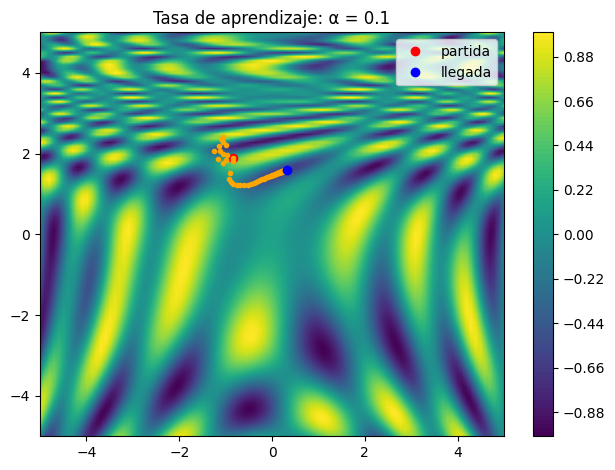

In [82]:
# Generamos un punto aleatorio sobre la superficie
Theta = np.random.uniform(-2, 2, size=2)

# Tasa de aprendizaje <> Hiperparámetro del algoritmo
alpha = 0.1
theta_min, N, Ts = grad_desc(func, alpha, Theta)

fig = plt.figure()
n = 100
Th0 = np.linspace(-5,5, n)
Th1 = np.linspace(-5,5, n)

F = np.zeros((n,n))
for ix, x in enumerate(Th0):
  for iy, y in enumerate(Th1):
    th = np.array([[x], [y]])   # Vector de parámetros
    F[iy, ix] = func(th)[0]

# plt.contour(X, Y, Z, 100)
plt.title(f'Tasa de aprendizaje: α = {alpha}')
plt.contourf(Th0, Th1, F, 100)
plt.colorbar()
plt.plot(Theta[0], Theta[1], 'or', label='partida')

for i in range(len(Ts)):
  plt.plot(Ts[i,0], Ts[i,1], '.', c='orange')

plt.plot(Ts[-1,0], Ts[-1,1], 'ob', label='llegada')
plt.legend()

fig.tight_layout()

In [135]:
# Tasa de aprendizaje <> Hiperparámetro del algoritmo
alphas = [0.001, 0.01, 0.1]

print('Parámetros [θ_0, θ_1] que minimizan la función')
print('----------------------------------------------')

for i, alpha in enumerate(alphas):
  print(f'\nTasa de aprendizaje: α = {alpha}')

  theta_min, N, Ts = grad_desc(func, alpha, Theta)

  print(f'* El valor mínimo de f está en θ:{theta_min}. \n\t* Iteraciones realizadas {N}\n')

Parámetros [θ_0, θ_1] que minimizan la función
----------------------------------------------

Tasa de aprendizaje: α = 0.001
* El valor mínimo de f está en θ:[0.21208158 2.38437002]. 
	* Iteraciones realizadas 141655


Tasa de aprendizaje: α = 0.01
* El valor mínimo de f está en θ:[0.21208204 2.38437011]. 
	* Iteraciones realizadas 14164


Tasa de aprendizaje: α = 0.1
* El valor mínimo de f está en θ:[0.32253407 1.60231825]. 
	* Iteraciones realizadas 149



**Observación:**

* Vemos que cuando aumenta la tasa de aprendizaje, el número de iteraciones requerido para encontrar los parámetros que minimizan la función de costo es menor comparado con la cantidad requerida cuando la tasa es más pequeña.

  En todos los casos se llega al resultado correcto, pero el algoritmo converge más rápido cuando la tasa es mayor.

* Sin embargo, la tasa no debería subirse de $0.1$ ya que ocurre un sobreajuste que dispara los parámetros a valores incoherentes en donde no se encuentra el mínimo de la función, esto se debe a la ocurrencia de un overflow u underflow en los resultados.

* Otro detalle muy importante es que el algoritmo del gradiente descendente dirije el gradiente hacia el mínimo local más cercano en donde la norma de este gradiente sea menor a la tolerancia asignada (esto es posible visualizarlo en el gráfico de contornos).

# Modelo de *machine learning*: Solución general

Un modelo general para solucionar un problema de machine learning puede ser estructurado como sigue:


a. Eliger el modelo a emplear:
\begin{equation}
h(X,\Theta)
\end{equation}

- En el caso de una regresion lineal tenemos que $h(X,\Theta=(\theta_0, \theta_1))$:

    \begin{equation}
    h(X) = (\theta_0 + \theta_1 X)
    \end{equation}


b. Eligir la funcion de coste :
-  Metrica Ecuclidiana:
\begin{equation}
J(\Theta)=\frac{1}{2m} \sum_{i=1}^m ( h_{\theta} (X^{(i)})-y^{(i)})^2
\end{equation}
- [Lista de funciones de coste que pueden ser empleadas](https://jmlb.github.io/flashcards/2018/04/21/list_cost_functions_fo_neuralnets/)


c. Aplicar el gradiente descendente iterativamente, hasta encontrar el minimo:  

\begin{equation}
\Delta \vec{\Theta} =  - \alpha \nabla J(\Theta)
\end{equation}



- En el caso de una regresion lineal tenemos que $h(X,\Theta=(\theta_0, \theta_1))$:


\begin{equation}
\theta_0 := \theta_0 - \alpha \frac{\partial J}{\partial \theta_0}
\end{equation}

\begin{equation}
\theta_1 := \theta_1 - \alpha \frac{\partial J}{\partial \theta_1}
\end{equation}

8. Empleando los siguientes datos :

```
X = np.linspace(0, 1, 100)
y = 0.2 + 0.2*X + 0.02*np.random.random(100)
```

y las herramientas desarrolladas en los apartados anteriores,
construya un algorítmo que permita determinar una regresión lineal.

9. Compare su resultado empleando la libreria linearRegresion() de sklearn.


Hint:

Pueden comprobar la solución de la superficie con el siguiente cálculo:


\begin{equation}
J(\Theta)=\frac{1}{2m} \sum_{i=1}^m ( h_{\theta} (X^{(i)})-y^{(i)})^2
\end{equation}



Sea $\Theta^T = [\theta_0,\theta_1]$


\begin{equation}
X =
\begin{bmatrix}
1& 1 & 1 & .&.&.&1\\
x_1^{(1)}&x_1^{(2)} & x_1^{(3)} & .&.&.&x_1^{(m)}\\
\end{bmatrix}_{(n+1) \times m}
\end{equation}

Luego:

\begin{equation}
\Lambda = \Theta^T X=
\begin{bmatrix}
(\theta_0 1 + \theta_1 x_1^1)\\
(\theta_0 1 + \theta_1 x_1^2)\\
.\\
.\\
.\\
(\theta_0 1 + \theta_1 x_1^m)\\
\end{bmatrix}
\end{equation}


Sumando sobre todos los elementos de matriz se puede encontrar la función de coste $J = \mathrm{\Lambda.mean()^2}$.

In [32]:
from sklearn.linear_model import LinearRegression
import time

In [134]:
X = np.linspace(0, 1, 100)
Y = 0.2 + 0.2*X + 0.02*np.random.random(100)

# Construcción del modelo lineal
H = lambda th, x: th[0] + th[1]*x

# Definimos la función de costo <> métrica euclidiana
def costo(theta, X, Y):
  h = H(theta, X)
  J = 0.5*np.mean((h-Y)**2)
  return J

thetai = np.random.uniform(-1, 1, size=2)
alpha = 0.08                   # Tasa de aprendizaje

ti = time.time()
args = X, Y
theta_min, N, Ts = grad_desc(costo, alpha, thetai, X,Y)
tf = time.time()

print("Modelo de Regresión Lineal a partir de Gradiente Descendente")
print("------------------------------------------------------------")

bg, mg = theta_min[0], theta_min[1]
print(f"* Pendiente: {bg}")
print(f"* Intercepto: {mg}")
print(f'* Núermo de iteraciones realizadas {N}')
print(f'* Tiempo de cómputo: {tf-ti} seg')

# Sklearn
Xk = X.reshape(-1, 1)
Yk = Y.reshape(-1, 1)

ti = time.time()
modelo = LinearRegression()
modelo.fit(Xk, Yk)
hs = modelo.predict(Xk)      # Estimaciones del modelo
tf = time.time()

# Mostrar los coeficientes del modelo
m = modelo.coef_.reshape(1,)[0]
b = modelo.intercept_.reshape(1,)[0]
score = modelo.score(Xk, Yk)

print("\n============ Modelo de Regresión Lineal Sklearn ============")
print("-------------------------------------------------------------")
print(f"* Pendiente: {m}")
print(f"* Intercepción: {b}")
print(f"* Puntaje R^2 del modelo de Regresión Lineal: {score}")
print(f'* Tiempo de cómputo: {tf-ti} seg \n')

Modelo de Regresión Lineal a partir de Gradiente Descendente
------------------------------------------------------------
* Pendiente: 0.20920549226524038
* Intercepto: 0.2027983372390747
* Núermo de iteraciones realizadas 1094
* Tiempo de cómputo: 0.22606348991394043 seg

============ Modelo de Regresión Lineal Sklearn ============
-------------------------------------------------------------
* Pendiente: 0.20148107673555646
* Intercepción: 0.20991610860109988
* Puntaje R^2 del modelo de Regresión Lineal: 0.9914605218523194
* Tiempo de cómputo: 0.0032110214233398438 seg 



Gráficos:

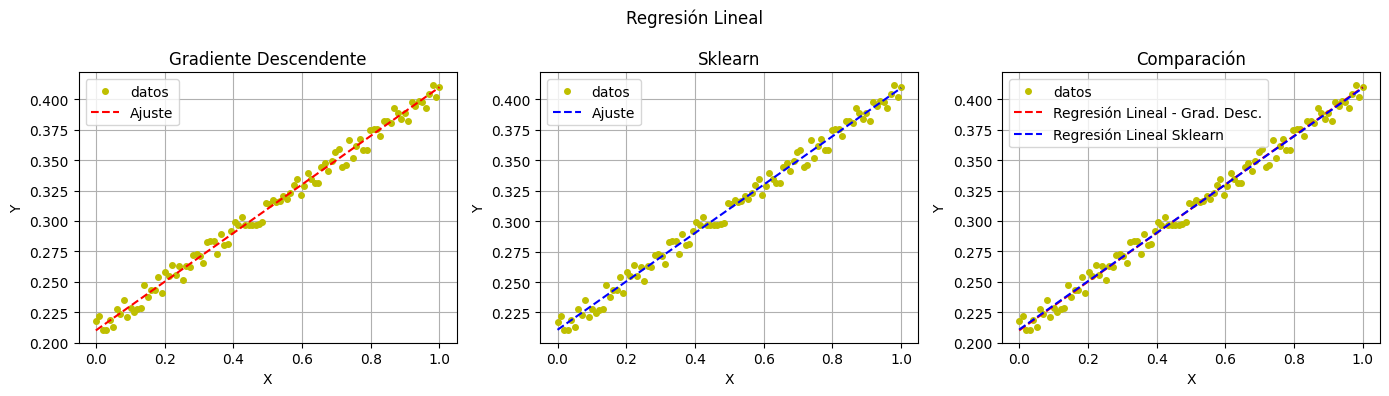

In [133]:
fig, axs = plt.subplots(1, 3, figsize=(14,4))

fig.suptitle('Regresión Lineal')

axs[0].set_title('Gradiente Descendente')
axs[0].plot(X, Y, 'yo', label='datos', markersize=4)
axs[0].plot(X, H(theta_min, X), 'r--', label='Ajuste')
axs[0].legend()
axs[0].grid()
axs[0].set_xlabel('X')
axs[0].set_ylabel('Y')

axs[1].set_title('Sklearn')
axs[1].plot(X, Y, 'yo', label='datos', markersize=4)
axs[1].plot(X, hs,'b--',label='Ajuste')
axs[1].grid()
axs[1].legend()
axs[1].set_xlabel('X')
axs[1].set_ylabel('Y')

axs[2].set_title('Comparación')
axs[2].plot(X, Y, 'yo', label='datos', markersize=4)
axs[2].plot(X, H(theta_min, X), 'r--', label='Regresión Lineal - Grad. Desc.')
axs[2].plot(X, hs, 'b--', label='Regresión Lineal Sklearn')
axs[2].grid()
axs[2].legend()
axs[2].set_xlabel('X')
axs[2].set_ylabel('Y')

fig.tight_layout()


**Observación:**

* El ajuste realizado con el Gradiente Descendente es muy preciso y casi que no difiere con el algoritmo de LinearRegresion().

* La diferencia de estos dos radica principalmente en el costo computacional que exigen, siendo el modelo de Sklearn muchísimo más ágil que el modelo del Gradiente Descendente elaborado en este trabajo.